You can try live regex at regex101.com

Extract numbers or digits

In [2]:
import re

text = "Musk Melon's number is 9998887776, you can call him for any queries regarding dodge. Tesla's revenue is 1000 billion. Tesla's CFO number is (999)-888-7777"

pattern = '\(\d{3}\)-\d{3}-\d{4}|\d{10}'      # \d{3} searches for 3 consecutive digits, | means or, \( means we are expecting a bracket, since ( is special symbol, we use back slash before it

print(re.findall(pattern, text))

['9998887776', '(999)-888-7777']


Extract note titles

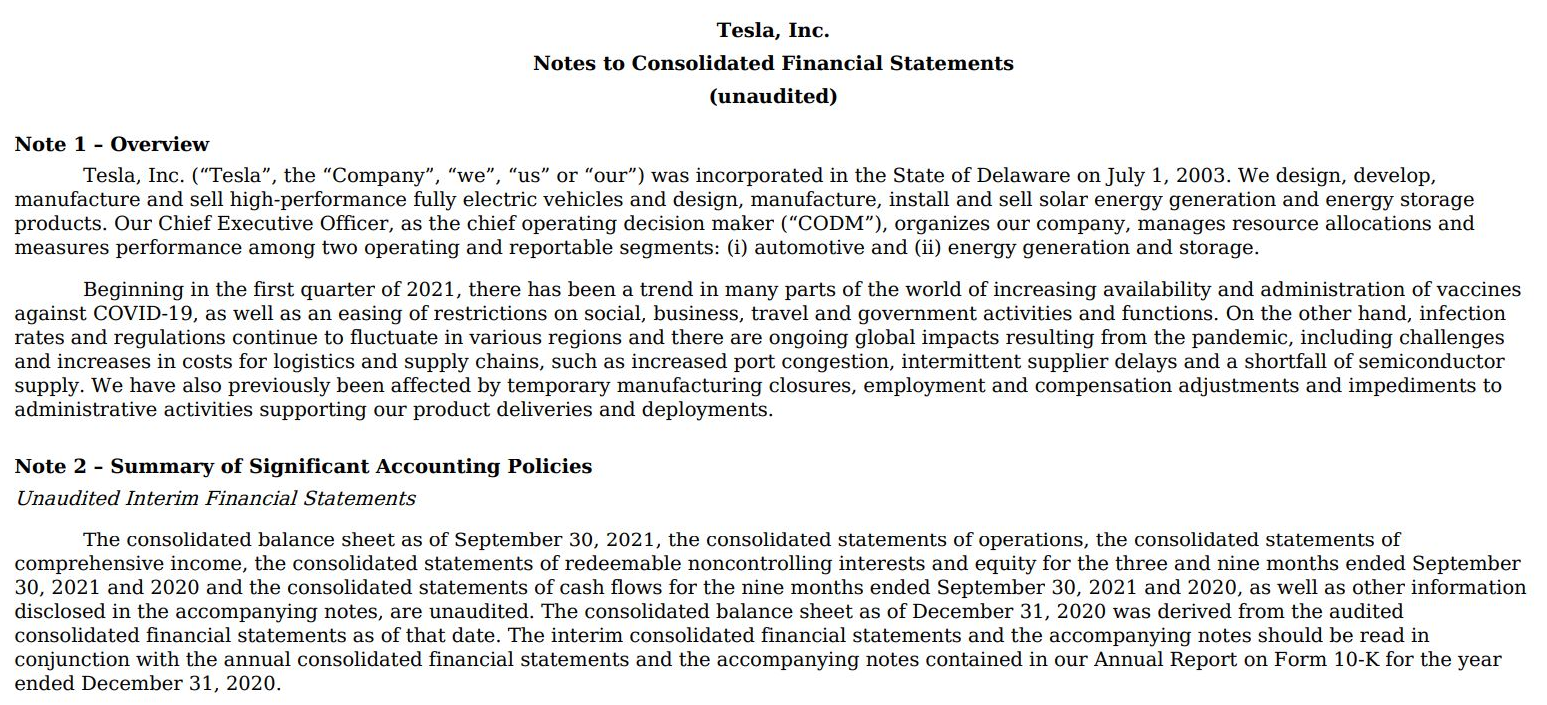

In [ ]:
text = '''
Note 1 - Overview
Tesla, Inc. (“Tesla”, the “Company”, “we”, “us” or “our”) was incorporated in the State of Delaware on July 1, 2003. We design, develop, manufacture and sell high-performance fully electric vehicles and design, manufacture, install and sell solar energy generation and energy storage
products. Our Chief Executive Officer, as the chief operating decision maker (“CODM”), organizes our company, manages resource allocations and measures performance among two operating and reportable segments: (i) automotive and (ii) energy generation and storage.
Beginning in the first quarter of 2021, there has been a trend in many parts of the world of increasing availability and administration of vaccines
against COVID-19, as well as an easing of restrictions on social, business, travel and government activities and functions. On the other hand, infection
rates and regulations continue to fluctuate in various regions and there are ongoing global impacts resulting from the pandemic, including challenges
and increases in costs for logistics and supply chains, such as increased port congestion, intermittent supplier delays and a shortfall of semiconductor
supply. We have also previously been affected by temporary manufacturing closures, employment and compensation adjustments and impediments to
administrative activities supporting our product deliveries and deployments.

Note 2 - Summary of Significant Accounting Policies
Unaudited Interim Financial Statements
The consolidated balance sheet as of September 30, 2021, the consolidated statements of operations, the consolidated statements of
comprehensive income, the consolidated statements of redeemable noncontrolling interests and equity for the three and nine months ended September
30, 2021 and 2020 and the consolidated statements of cash flows for the nine months ended September 30, 2021 and 2020, as well as other information
disclosed in the accompanying notes, are unaudited. The consolidated balance sheet as of December 31, 2020 was derived from the audited
consolidated financial statements as of that date. The interim consolidated financial statements and the accompanying notes should be read in
conjunction with the annual consolidated financial statements and the accompanying notes contained in our Annual Report on Form 10-K for the year
ended December 31, 2020.
'''


pattern = 'Note \d - ([^\n]*)'                    # if we want to search for a term we can directly mention that term here like we did for note. [^abc] means any character except abc, * means zero or more. eg. a* means zero or more of 'a'. 
                                                 #() means it will capture and print only thing that matches inside the bracket
matches = re.findall(pattern, text)
matches

['Overview', 'Summary of Significant Accounting Policies']

Extract financial periods from a company's financial reporting

In [ ]:
text = '''
The gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion.
In previous quarter i.e. FY2020 Q4 it was $3 billion. 
'''

pattern = 'FY\d{4} Q[1-4]'  #again the \d{4} means we want 4 digits after FY. Q[1-4] means we want 1 digit between range 1-4 after the letter Q.

matches = re.findall(pattern, text)
matches


#if I want onlythe numbers or text after FY, then I can use parentheses 
pattern = 'FY(\d{4} Q[1-4])'  #it wil only capture whatever is there after FY

matches = re.findall(pattern, text)
matches

['FY2021 Q1', 'FY2020 Q4']

Case insensitive pattern match using flags

In [4]:
text = '''
The gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion.
In previous quarter i.e. fy2020 Q4 it was $3 billion. 
'''

pattern = 'FY\d{4} Q[1-4]'

matches = re.findall(pattern, text, flags=re.IGNORECASE)          #flags are used to specify some conditions while searching for matches. Hence we used IGNORECASE to capture everything iirespective of case
matches

['FY2021 Q1', 'fy2020 Q4']

Extract only financial numbers

Quick note here:

zero or one of a = a?
zero or more of a = a*
one or more of a = a+

if you want to see an example run the following regex code in the following text

text = "I have $4 billion dollars and he has $ dollars"     #note that there is no number after dollar symbol

star_pattern = '\$([0-9\.]*)'     # * means zero or more
plus_pattern = '\$([0-9\.]+)'     # + means one or more 

print(re.findall(star_pattern, text))   #this will print ['4', ''], because it will consider the blank values after $ symbol since * means zero or more
print(re.findall(plus_pattern, text))   #this will print ['4'], because it will not consider the blank values. it will only consider if it has soem value after $ as + means one or more


In [ ]:
text = '''
Tesla's gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion. 
In previous quarter i.e. FY2020 Q4 it was $ billion.
'''

pattern = '\$([0-9\.]+)'             #since $ and . are special symbol, we use \ for it. then we search for any digit from 0-9 and for a dot as well. 
matches = re.findall(pattern, text)
matches

['4.85', '']

Extract financial periods and financial numbers both

In [ ]:
text = '''
Tesla's gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion. 
In previous quarter i.e. FY2020 Q4 it was $3 billion.
'''


pattern = 'FY(\d{4} Q[1-4])[^\$]+\$([0-9\.]+)'      #this will first match the FY and then will match the dollar characters. [^\$]+ means it will ignore all charcters except $ in between FY and $


matches = re.findall(pattern, text)
matches


[('2021 Q1', '4.85'), ('2020 Q4', '3')]

Regex for NLP

In [ ]:
import re

chat1='codebasics: Hello, I am having an issue with my order # 412889912'
chat2='codebasics: I have a problem with my order number 412889912'
chat3='codebasics: My order 412889912 is having an issue, I was charged 300$ when online it says 280$'


pattern = 'order[^\d]*(\d*)'                    #[^\d] this means ignore all the text between order and the first numerical digit. this will work for all the three different type of chats mentioned above
matches = re.findall(pattern, chat1)
matches

['412889912']

In [4]:
def get_pattern_match(pattern, text):
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]
    

get_pattern_match('order[^\d]*(\d*)', chat1)

'412889912'

Retrieve email id and phone

In [14]:
chat1 = 'codebasics: you ask lot of questions 😠  1235678912, abc@xyz.com'
chat2 = 'codebasics: here it is: (123)-567-8912, abc@xyz.com'
chat3 = 'codebasics: yes, phone: 1235678912 email: abc@xyz.com'

In [ ]:
get_pattern_match('[a-zA-Z0-9_]*@[a-z]*\.[a-zA-Z0-9]*',chat1)

In [25]:
get_pattern_match('(\d{10})|(\(\d{3}\)-\d{3}-\d{4})',chat1)    #we will get an empty second item because the second condition for item is not satisfied

('1235678912', '')

(2) Regex for Information Extraction

In [ ]:
text='''
Born	Elon Reeve Musk
June 28, 1971 (age 50)
Pretoria, Transvaal, South Africa
Citizenship	
South Africa (1971–present)
Canada (1971–present)
United States (2002–present)
Education	University of Pennsylvania (BS, BA)
Title	
Founder, CEO and Chief Engineer of SpaceX
CEO and product architect of Tesla, Inc.
Founder of The Boring Company and X.com (now part of PayPal)
Co-founder of Neuralink, OpenAI, and Zip2
Spouse(s)	
Justine Wilson
​
​(m. 2000; div. 2008)​
Talulah Riley
​
​(m. 2010; div. 2012)​
​
​(m. 2013; div. 2016)
'''


In [ ]:
get_pattern_match(r'age (\d+)', text)